# Plot Risk Bound: Comparison Against Rademacher Bounds (Bartlett and Mendelsen 2002)
---

We benchark our risk bound against the following one of Bartlett and Mendelsen:

From [Theorems 8 and 12](https://www.jmlr.org/papers/volume3/bartlett02a/bartlett02a.pdf) and [Lemma C.1](https://jmlr.org/papers/v24/22-1293.html) we have the following benmchark bound.

The Rademacher complexity of the class of $L$-lipschitz functions, defined on a $d$-dimensional domain is bounded as
$$
\begin{aligned}
    \sup_{f \in \mathcal{F}_L} | \mathfrak{R}(f ; \mu) - \hat{\mathfrak{R}}(f) |
%  \le
%  2
%  %%% Using Lemma C.1: Rademacher Complexity of \mathcal{F}_L defined below
%     \left( \frac{8(d+1)^2D^2(16BL)^d}{N}\right)^{1/(d+3)} + 4 \sqrt{2} D \left( \frac{1}{N}\frac{(16BL)^d}{(8(d+1)D)^{d+1}}\right)^{1/(d+3)}
%  %%%
%  + \|\ell\|_\infty \sqrt{\frac{8\log 2/\delta}{N}}
\le &
 %%% Using Lemma C.1: Rademacher Complexity of \mathcal{F}_L defined below
    \frac{2}{N^{1/(d+3)}}
     \,
     ( 8(d+1)^2D^2 )^{1/(d+3)}
    \,
    (16BL)^{1/(1+  3/d)}
    \, 
\\
&
    + 
    \frac{4 \sqrt{2} D}{
    N^{1/(d+3)}
    } 
    \,
    \frac{
        (16BL)^{1/(1+3/d)}
    }{
    (8(d+1)D)^{\frac{1+1/d}{1+3/d}}
    }
 %%%
\\
 &
 + \|\ell\|_\infty \sqrt{\frac{8\log 2/\delta}{N}}
\end{aligned}
$$
where $D := \sup_{f \in \mathcal{F}_L} \|f\|_\infty$ and $\operatorname{diam}(\mathcal{X}) \leq B$.

---
In the case where $\phi=I_{\mathbb{R}^d}$ we obtain the following bound:
$$
    \sup_{f \in \mathcal{F}_L} | \mathfrak{R}(f ; \mu) - \hat{\mathfrak{R}}(f) |
 \le
(L+1)\,\operatorname{diam}(\mathcal{X}\times \mathcal{Y})\big(\frac{4\sqrt{(d+1)}}{N^{1/(d+1)}} +\frac{\ln(2/\delta)^{1/2}}{N^{1/2}}\big)
$$
We simply compute it as follows:
<!-- #### Verification
- [First Limit Term in $C_m$ since it is monotonically increasing at converges to 1 as $d\to \infty$](https://www.wolframalpha.com/input?i=limit+2*%28+%28x%2F2+-+1%29%2F%282*%281-2%5E%281-%28x%2F2%29%29%29%29+%29%5E%282%2Fx%29+x+to+infinity)
- [Second Term in $C_m$ maximized at 3; when $d\ge 3$ since it is monotonically decreasing](https://www.wolframalpha.com/input?i=1%2B+%281%2F%282*%28%28m%2F2%29-1%29%29%29+%2C+m+%3D3)

So together, that terms is bounded above by
$$
C_m \le 2\,1 (1+1) d^{1/2} = 4\,d^{1/2}.
$$
[Wolfram verification](https://www.wolframalpha.com/input?i=4+-+%282*%28+%28x%2F2+-+1%29%2F%282*%281-2%5E%281-%28x%2F2%29%29%29%29+%29%5E%282%2Fx%29+*+%281%2B+%281%2F%282*%28%28x%2F2%29-1%29%29%29+%29++%29+). -->

---

### The Structure of $\mathcal{X}$ - k vs. N

#### We set k manually or we consider the no. Points Needed to Pack a Cube:

From [George G. Lorentz, Manfred v. Golitschek, and Yuly Makovoz. Constructive approximation - Proposition 15.1.3](https://link.springer.com/book/9783642646102) the packing number of $[0,\operatorname{1}]^d$ in $\ell_{\infty}^d$ by $\ell_{\infty}^d$-balls of radius $10^{-p}$ is no more than
$$
    \Big\lceil
    2^{-d}
            \,
            \Big(10^{p}*\operatorname{diam}\Big)^d
    \Big\rceil
\le 
    k
\le 
    \Big\lceil
    3^{-d}
            \,
            \Big(10^{p}*\operatorname{diam}\Big)^d
    \Big\rceil
$$
we use this lower-bound to compute $k$.

If we only consider representation dimensions of at-least $\lceil 8 \, \ln(k)\rceil$ then $\ln(k)$ is at-most
$$
    \log(k)
\le
    (d+1)\big(
                p
                \,
                \log(10) 
            + 
                 \log(d/9)/2
    \big)    
.
$$

#### No. $\ln(k)$
Set the (natural) logarithmic number of points in the grid; i.e. induced by discrete computing limitations.

In [1]:
d = 1*(10**7)
p = 1*(10**9)

print('Dimension: '+str(d))
print('Distance Between Points on the Grid: '+str(10**-p))

Dimension: 10000000
Distance Between Points on the Grid: 0.0


In [2]:
# Flag Risk-Engine that we are considering the Rademacher bound comparioson
is_Rademacher = True

---

## For Reference: Euclidean Embedding Rates

For reference, the embeddings are.  We will restrict computations to the case where $8\lceil \ln k \rceil < m\le d$ to avoid computing $k$, and only working with $\log(k)$.

| $m$ | $m<d$ | Worst-Case Distortion $(\tau(\phi))$ | |
| :--- | :--- | :---: | :---: |
| $1\le m \le 2$ | Yes | $12\,k$ |  |
| $3 \le m \le 8 \lceil \ln k\rceil$ | Yes | $\frac{15 \, \log(k)^{1/2} k^{2/m}}{m^{1/2}}$ |   |
| $8 \lceil \ln k\rceil < m$ | Yes | $48 \lfloor \log_2 k + 1 \rfloor(\frac{m^{1/2} + 2 \sqrt{2}\log(k)^{1/2}}{m^{1/2} - 2\sqrt{2}\log(k)^{1/2}})^{1/2}$ |   |
| $m\ge d$ | No | $1$ |   |

---

All computations correspond to the Huber loss function $\ell$ 
$$
\ell(y, \tilde{y}) = \begin{cases}
 \frac{1}{2}(y - \tilde{y})^2                   & \text{for } |y - \tilde{y}| \le \delta, \\
 \delta\ \cdot \left(|y - \tilde{y}| - \frac{1}{2}\delta\right), & \text{otherwise.}
\end{cases}
$$
for each $y,\tilde{y}\in [0,\infty)$.  Furthermore, for any $M\ge 0$; the Huber loss function satisfies:
- $1$-Lipschitz
- $\|\ell|_{[0,M]^2}\|_{\infty}= M$.

## Lipschitz Constant of Hypothesis Class

W.l.o.g. We consider $1$-Lipschitz functions but allow the option for more general classes.

In [3]:
Lip_WorstCase = 1

## Defaults Parameters (Only exist to coerce to general risk engine).
Default is 3; otherwise the comparison no longer applies to results of [Bartlett and Mendelson](https://www.jmlr.org/papers/volume3/bartlett02a/bartlett02a.pdf).

In [4]:
# Default in this model.
distortion_type = 3
# This is also default to true for the same reason.
Set_Lip_Constant = True

### Number of Samples (N)

Number of training instances to consider roughly (N); depending on if ``N_is_Small`` is set to true or not:

- if ``N_is_Small==True``: $N$ ranges from $\lfloor N/10 \rfloor$ to $N$
- if ``N_is_Small==True``: $N$ ranges from $N^3$ to $N^4$

In [5]:
N = 1*(10**12)

In [6]:
N_is_Small = True

### Compute Diameter of $[0,1]^d$

In [7]:
diam = d**(1/2)
print('Prototypical Space: [0,'+str(diam)+']^'+str(d))

Prototypical Space: [0,3162.2776601683795]^10000000


Compute number of points on the grid.

In [8]:
import numpy as np
print('The logarithmic number of points in the grid is at-most: '+str( int((d+1)*p*np.log(10) + np.log(d/9)/2 )))

The logarithmic number of points in the grid is at-most: 23025853232525560


In this code, we do not allow for super low-dimensional embeddings; i.e. below representation dimension $\lceil 8*\ln(k)\rceil$.  This is simply due to numerical issues with $k=\mathcal{O}(10^{pd}\,3^d)$ exploding, either as $p$ or $d$ diverge.  I.e. we can only stability work with $\ln(k)$.

## Import Packages and Set Global Hyperparameters

In [9]:
%run ./SupportFiles/Dependancies.ipynb
print('---')

Dependancies and Packages Loaded
---


# Set Global Parameters

#### Decide on How Many Points to Use?

Load Global hyperparameters, now that internal parameters have been defined.

In [10]:
%run ./SupportFiles/Global_Hyperparameters.ipynb
print('---')

Results are to Hold with Probability at-least: 95.0%
Max Representation Space Dimension (F aka m): 4.605170185988092
---


---

#### Load helper functions.

In [11]:
print('---')
%run ./SupportFiles/Helper_Functions.ipynb
print('---')

---
Helper Functions Loaded
---


## Generate Plot

---

Load risk bound functions.

In [12]:
%run ./SupportFiles/Risk_Bound_Engine-BMComparison.ipynb

In [13]:
def get_risk_bound__NVar__MBCompare_scalar(N):
    return get_risk_bound__vs_BM___scalar(F=d,N=N,d=d)

get_risk_bound__NVar__MBCompare = np.vectorize(get_risk_bound__NVar__MBCompare_scalar)

get_risk_bound__NVar__MBCompare(10**4)

array(56568619.66696411)

---

#### Compute

Generate a list of all embedding dimensions to be considered.

In [14]:
# Moderate Embedding Dimension Rates vs. Distortion
F_indexing_set = range(int(d*.9999),d+1)

print('We will do '+str(len(F_indexing_set))+' iterations.')

We will do 1001 iterations.


In [15]:
#### Compute digital computing bound
for F_global in tqdm(F_indexing_set):
    
    if F_global >d:
        print('Breaking Loop Early at representation dimension: ' + str(F_global)+'.')
        print('Further Improvement Impossible.')
        break

    def get_risk_bound__NVar__MBCompare_scalar(N):
        return get_risk_bound__vs_BM___scalar(F=F_global,N=N,d=d)

    get_risk_bound__NVar__MBCompare = np.vectorize(get_risk_bound__NVar__MBCompare_scalar)
    
    if F_global == min(F_indexing_set):
        # Compute Risk Bound
        Risk_Bounds_DC = get_risk_bound__NVar__MBCompare(N_sequence)
    else:
        # Compute Risk Bound
        Risk_Bounds_DC__loop = get_risk_bound__NVar__MBCompare(N_sequence)
        Risk_Bounds_DC = np.minimum(Risk_Bounds_DC,Risk_Bounds_DC__loop)
        
    #### Update Using Benchmark against high dimensional analytic version
    Risk_Bounds_DC_HDB = high_dim_riskbound(N_sequence)
    Risk_Bounds_DC = np.minimum(Risk_Bounds_DC,Risk_Bounds_DC_HDB)
#     print(Risk_Bounds_DC)

100%|██████████████████████████████████| 1001/1001 [03:00<00:00,  5.54it/s]


In the case where $\phi=I_{\mathbb{R}^d}$ we obtain the following bound:
$$
(L+1)\,\operatorname{diam}(\mathcal{X}\times \mathcal{Y})\big(\frac{4\sqrt{d+1}}{N^{1/(d+1)}} +\frac{\ln(2/\delta)^{1/2}}{N^{1/2}}\big)
$$
We simply compute it as follows:
<!-- #### Verification
- [First Limit Term in $C_m$ since it is monotonically increasing at converges to 1 as $d\to \infty$](https://www.wolframalpha.com/input?i=limit+2*%28+%28x%2F2+-+1%29%2F%282*%281-2%5E%281-%28x%2F2%29%29%29%29+%29%5E%282%2Fx%29+x+to+infinity)
- [Second Term in $C_m$ maximized at 3; when $d\ge 3$ since it is monotonically decreasing](https://www.wolframalpha.com/input?i=1%2B+%281%2F%282*%28%28m%2F2%29-1%29%29%29+%2C+m+%3D3)

So together, that terms is bounded above by
$$
C_m \le 2\,1 (1+1) d^{1/2} = 4\,d^{1/2}.
$$
[Wolfram verification](https://www.wolframalpha.com/input?i=4+-+%282*%28+%28x%2F2+-+1%29%2F%282*%281-2%5E%281-%28x%2F2%29%29%29%29+%29%5E%282%2Fx%29+*+%281%2B+%281%2F%282*%28%28x%2F2%29-1%29%29%29+%29++%29+). -->

#### Compute Bartlett and Mendelon Bounds

In [16]:
#### Compute continuous space bound (Bartlett and Mendelson)
Risk_Bounds_Cnt = Rad_Comp_Bound(N_sequence)

## Plots

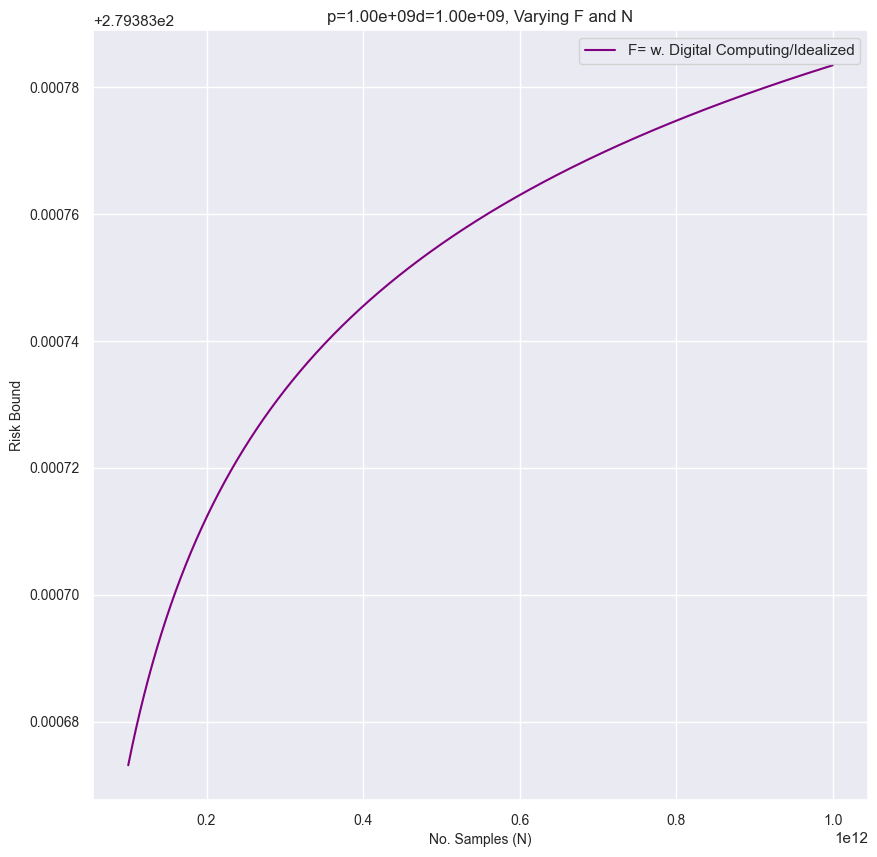

In [17]:
ax = plt.figure(figsize=(10,10))
sns.set_style("darkgrid")

plt.title('p='+str('{:.2e}'.format(p))+'d='+str('{:.2e}'.format(p))+', Varying F and N')
    

plt.xlabel('No. Samples (N)')
plt.ylabel('Risk Bound')# on $\sup_{f\in \mathcal{F}}\,|\mathcal{R}(\hat{f})-\hat{\mathcal{R}}(\hat{f})|$')


    
# Plot Risk-Bound
plt.plot(N_sequence, 
         Risk_Bounds_DC/Risk_Bounds_Cnt,
         label = 'F= w. Digital Computing/Idealized',
         c='purple')

# plt.plot(N_sequence, 
#          Risk_Bounds_DC_HDB,
#          label = 'F= w. Digital Computing (+Rounding)',
#          c='blue')


# plt.plot(N_sequence, 
#          Risk_Bounds_Cnt,
#          label = 'F= Idealized',
#          c='orange')

plt.legend()
    
    
plt.xlabel('No. Samples (N)',fontsize=10)
plt.ylabel('Risk Bound',fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# ----------------------------------------------------- #

plt.savefig('Experiments/Risk_Bound_F/BMCompare_'+str(N_is_Small)+'____p___'+str(p)+'___d____'+str(d)+'.pdf')
plt.show()

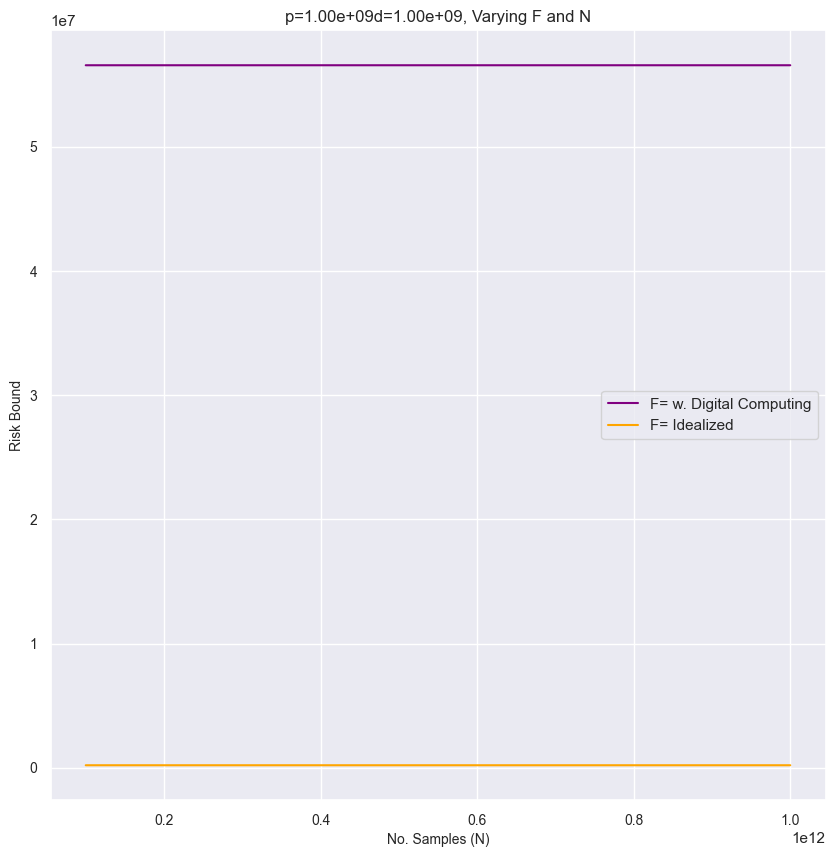

In [18]:
ax = plt.figure(figsize=(10,10))
sns.set_style("darkgrid")

plt.title('p='+str('{:.2e}'.format(p))+'d='+str('{:.2e}'.format(p))+', Varying F and N')
    

plt.xlabel('No. Samples (N)')
plt.ylabel('Risk Bound')# on $\sup_{f\in \mathcal{F}}\,|\mathcal{R}(\hat{f})-\hat{\mathcal{R}}(\hat{f})|$')


    
# Plot Risk-Bound
plt.plot(N_sequence, 
         Risk_Bounds_DC,
         label = 'F= w. Digital Computing',
         c='purple')


plt.plot(N_sequence, 
         Risk_Bounds_Cnt,
         label = 'F= Idealized',
         c='orange')

plt.legend()
    
    
plt.xlabel('No. Samples (N)',fontsize=10)
plt.ylabel('Risk Bound',fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# ----------------------------------------------------- #

plt.savefig('Experiments/Risk_Bound_F/BMCompare_'+str(N_is_Small)+'____p___'+str(p)+'___d____'+str(d)+'.pdf')
plt.show()

#### Summary of Experiment

In [19]:
print('N Min: '+latex_float(N_min))
print('N Max: '+latex_float(N_max))
print('For Paper:')
print(latex_float(N_min)+'<N<'+latex_float(N_max))
print('dimension: '+latex_float(d))
print('p: '+latex_float(p))

N Min: 1 \times 10^{11}
N Max: 1 \times 10^{12}
For Paper:
1 \times 10^{11}<N<1 \times 10^{12}
dimension: 1 \times 10^{7}
p: 1 \times 10^{9}


---
## Bonus Plots:

Plot without Bartlett and Mendelson bound.

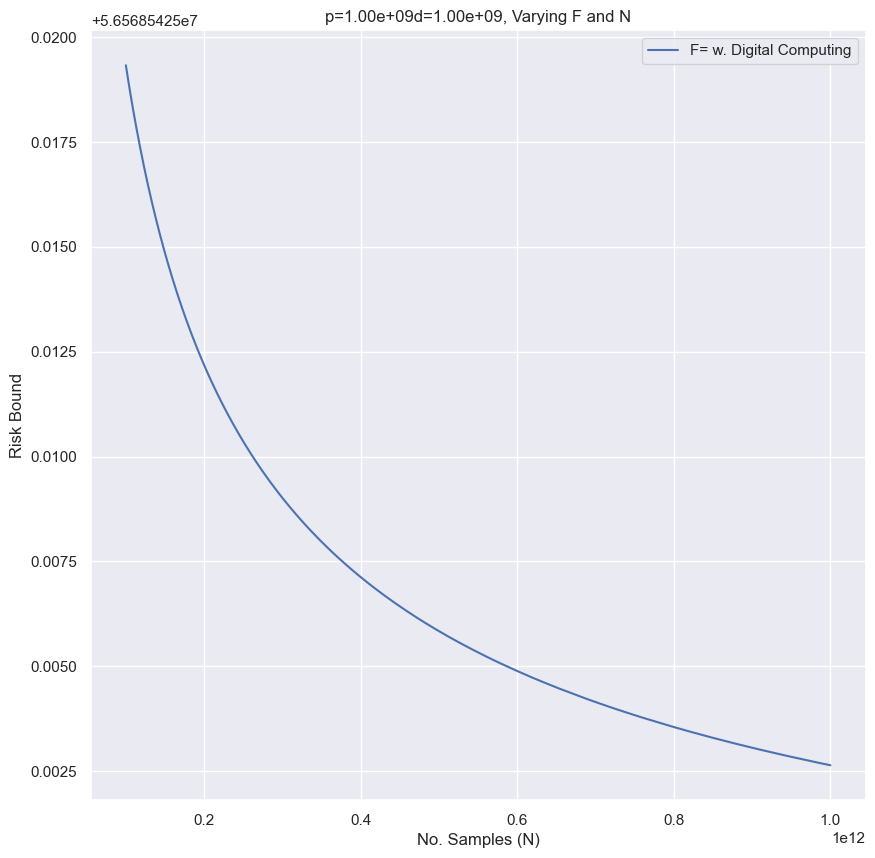

In [20]:
plt.figure(figsize=(10,10))
sns.set_style("darkgrid")

plt.title('p='+str('{:.2e}'.format(p))+'d='+str('{:.2e}'.format(p))+', Varying F and N')
    

plt.xlabel('No. Samples (N)')
plt.ylabel('Risk Bound')

    
# Plot Risk-Bound
plt.plot(N_sequence, 
     Risk_Bounds_DC,
     label = 'F= w. Digital Computing')

plt.legend()

#### Plot BM Risk Bounds Only (for Visualization)

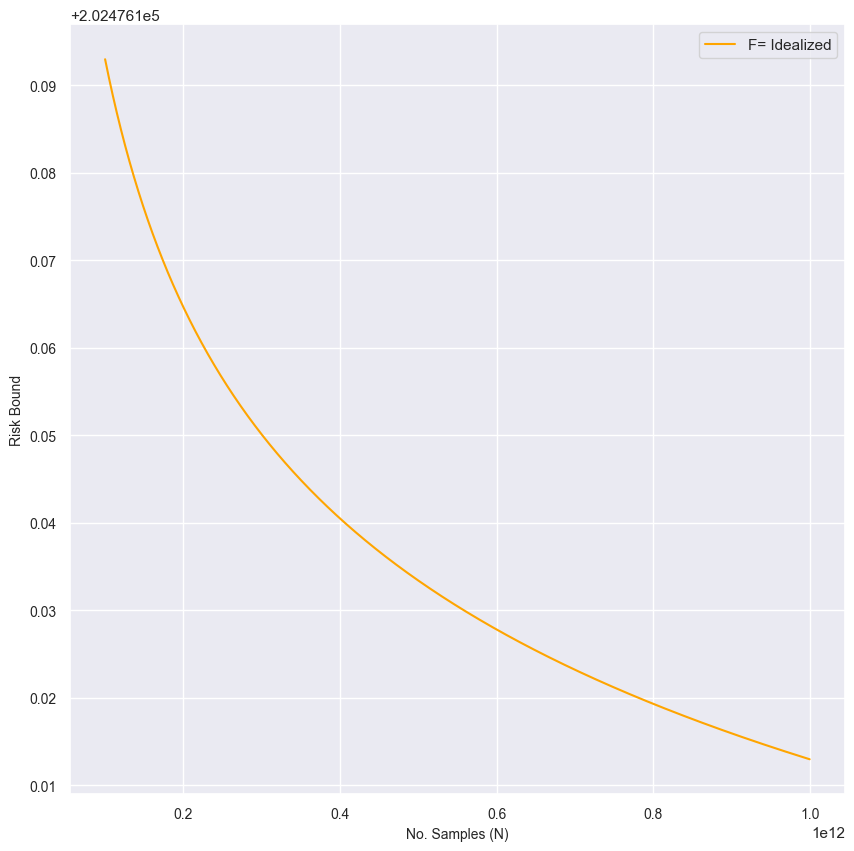

In [21]:
ax = plt.figure(figsize=(10,10))
sns.set_style("darkgrid")

plt.plot(N_sequence, 
     Risk_Bounds_Cnt,
     label = 'F= Idealized',c='orange')

plt.legend()
    
    
plt.xlabel('No. Samples (N)',fontsize=10)
plt.ylabel('Risk Bound',fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# ----------------------------------------------------- #

plt.savefig('Experiments/Risk_Bound_F/BMCompare_'+str(N_is_Small)+'____p___'+str(p)+'___d____'+str(d)+'.pdf')
plt.show()

---
# Fin #
---

---

---